In [2]:
pip install pandas scikit-learn matplotlib

Enter the name of the storm: Amy
Latitude Prediction MSE: 0.10131409245705465
Longitude Prediction MSE: 0.11024364324454224


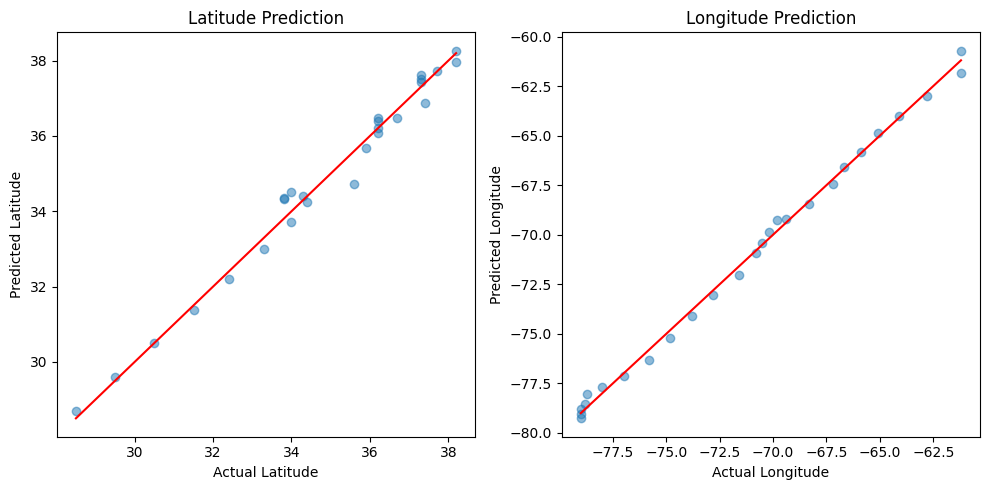

         lat       long  month  day  hour
0  38.531218 -60.173291    7.0  3.0  18.0
1  38.830113 -59.275239    7.0  4.0   0.0
2  39.067934 -58.232709    7.0  4.0   6.0
3  39.305061 -57.299703    7.0  4.0  12.0
4  39.560618 -56.415110    7.0  4.0  18.0


In [4]:
# Baseline Model
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
stripped_storms_df = pd.read_csv('/content/amy_storms.csv')

# Input the storm name
storm_name = input("Enter the name of the storm: ")

# Ensure it is a storm name that is listed in the csv file
amy_storms = stripped_storms_df[stripped_storms_df['name'] == storm_name]

if amy_storms.empty:
    print("There is no storm with the following name.")
else:
    # Prepare the data for training
    X = amy_storms[['lat', 'long', 'month', 'day', 'hour']].values
    y_lat = amy_storms['lat'].shift(-1).dropna().values  # Next latitude
    y_long = amy_storms['long'].shift(-1).dropna().values  # Next longitude

    # Remove the last row from X to match y_lat and y_long lengths
    X = X[:-1]

    # Train the Linear Regression model for latitude prediction
    lat_model = LinearRegression()
    lat_model.fit(X, y_lat)

    # Train the Linear Regression model for longitude prediction
    lon_model = LinearRegression()
    lon_model.fit(X, y_long)

    # Make predictions
    lat_predictions = lat_model.predict(X)
    lon_predictions = lon_model.predict(X)

    # Evaluate the model (Caluclate the MSE)
    lat_mse = ((lat_predictions - y_lat) ** 2).mean()
    lon_mse = ((lon_predictions - y_long) ** 2).mean()
    print(f'Latitude Prediction MSE: {lat_mse}')
    print(f'Longitude Prediction MSE: {lon_mse}')

    # Visualize the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_lat, lat_predictions, alpha=0.5)
    plt.plot([min(y_lat), max(y_lat)], [min(y_lat), max(y_lat)], color='red')
    plt.xlabel('Actual Latitude')
    plt.ylabel('Predicted Latitude')
    plt.title('Latitude Prediction')

    plt.subplot(1, 2, 2)
    plt.scatter(y_long, lon_predictions, alpha=0.5)
    plt.plot([min(y_long), max(y_long)], [min(y_long), max(y_long)], color='red')
    plt.xlabel('Actual Longitude')
    plt.ylabel('Predicted Longitude')
    plt.title('Longitude Prediction')

    plt.tight_layout()
    plt.show()

    # Predict the next 5 latitudes and longitudes
    last_known_point = amy_storms.iloc[-1][['lat', 'long', 'month', 'day', 'hour']].values.reshape(1, -1)

    next_points = []
    for _ in range(5):
        next_lat = lat_model.predict(last_known_point)
        next_lon = lon_model.predict(last_known_point)
        month, day, hour = last_known_point[0][2], last_known_point[0][3], last_known_point[0][4] + 6
        if hour >= 24:
            hour -= 24
            day += 1
        next_point = [next_lat[0], next_lon[0], month, day, hour]
        last_known_point = np.array(next_point).reshape(1, -1)
        next_points.append(next_point)

    # Convert next_points to DataFrame
    next_points_df = pd.DataFrame(next_points, columns=['lat', 'long', 'month', 'day', 'hour'])
    print(next_points_df)

In [3]:
import pandas as pd
# Generate a dataset that is missing the last 5 data points of 'Amy" to test the accuracy of the model
data = {
    "name": ["Amy"] * 27,
    "month": [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
    "day": [27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    "hour": [0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12],
    "lat": [27.5, 28.5, 29.5, 30.5, 31.5, 32.4, 33.3, 34, 34.4, 34, 33.8, 33.8, 34.3, 35.6, 35.9, 36.2, 36.2, 36.2, 36.2, 36.7, 37.4, 37.3, 37.3, 37.3, 37.7, 38.2, 38.2],
    "long": [-79, -79, -79, -79, -78.8, -78.7, -78, -77, -75.8, -74.8, -73.8, -72.8, -71.6, -70.8, -70.5, -70.2, -69.8, -69.4, -68.3, -67.2, -66.7, -65.9, -65.1, -64.1, -62.8, -61.2, -61.2],
    "wind": [25, 25, 25, 25, 25, 25, 25, 30, 35, 40, 45, 50, 50, 55, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 55, 55, 55]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('amy_storms.csv', index=False)

Latitude Prediction MAE: 3.701011199999999
Longitude Prediction MAE: 3.8792103999999994


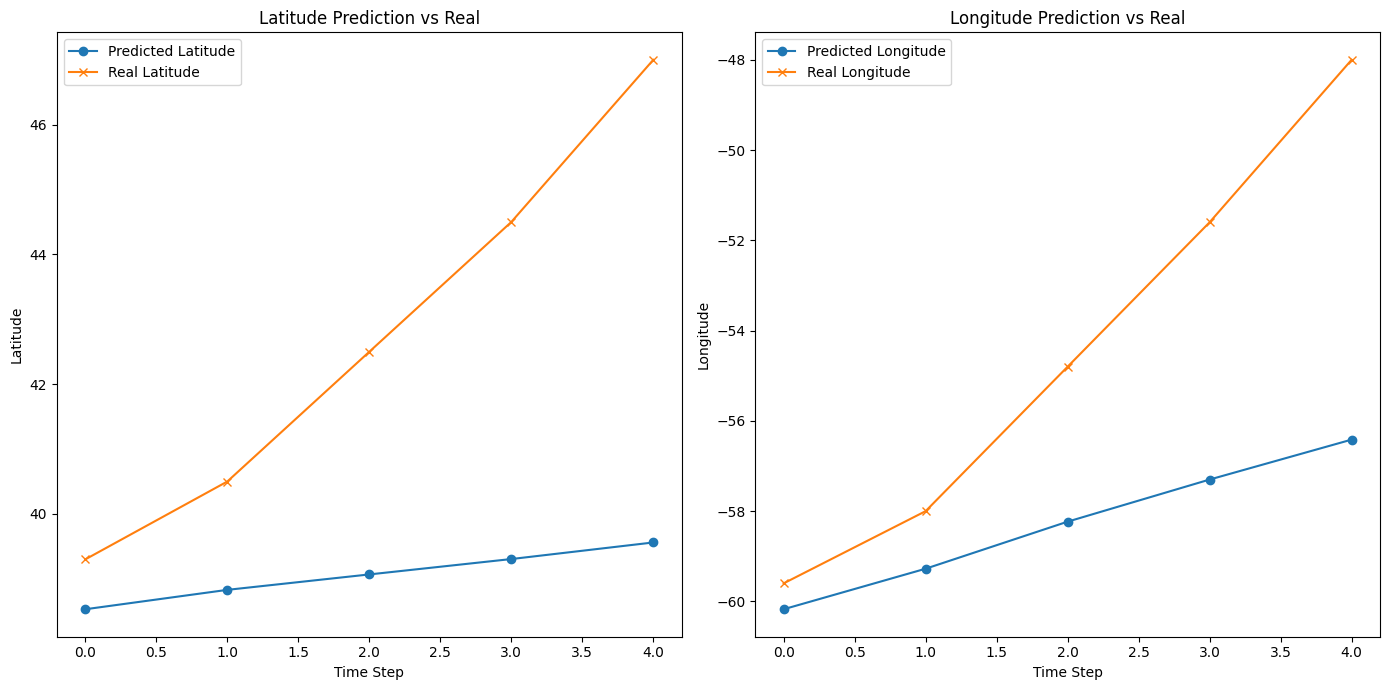

In [5]:
# Testing Accuracy
from sklearn.metrics import mean_absolute_error

# Define the predicted data
predicted_data = {
    "lat": [38.531218, 38.830113, 39.067934, 39.305061, 39.560618],
    "long": [-60.173291, -59.275239, -58.232709, -57.299703, -56.415110],
    "month": [7, 7, 7, 7, 7],
    "day": [3, 4, 4, 4, 4],
    "hour": [18, 0, 6, 12, 18]
}

# Define the real data
real_data = {
    "lat": [39.3, 40.5, 42.5, 44.5, 47],
    "long": [-59.6, -58, -54.8, -51.6, -48],
    "month": [7, 7, 7, 7, 7],
    "day": [3, 3, 4, 4, 4],
    "hour": [12, 18, 0, 6, 12]
}

# Convert the data to DataFrames
predicted_df = pd.DataFrame(predicted_data)
real_df = pd.DataFrame(real_data)

# Calculate the accuracy using Mean Absolute Error
lat_mae = mean_absolute_error(real_df['lat'], predicted_df['lat'])
lon_mae = mean_absolute_error(real_df['long'], predicted_df['long'])

print(f'Latitude Prediction MAE: {lat_mae}')
print(f'Longitude Prediction MAE: {lon_mae}')

# Plot the results
plt.figure(figsize=(14, 7))

# Plot latitude
plt.subplot(1, 2, 1)
plt.plot(predicted_df['lat'], label='Predicted Latitude', marker='o')
plt.plot(real_df['lat'], label='Real Latitude', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Latitude')
plt.title('Latitude Prediction vs Real')
plt.legend()

# Plot longitude
plt.subplot(1, 2, 2)
plt.plot(predicted_df['long'], label='Predicted Longitude', marker='o')
plt.plot(real_df['long'], label='Real Longitude', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Longitude')
plt.title('Longitude Prediction vs Real')
plt.legend()

plt.tight_layout()
plt.show()
